<h1>Import Required Libraries for Wine Dataset Project<h1>

In [ ]:
import pandas as pd  # For DataFrame operations
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For plotting
from sklearn.datasets import load_wine  # Wine dataset
from sklearn.model_selection import train_test_split  # Split data into training and test sets

<h1>Wine Dataset Loading and Train-Test Split<h1>

In [ ]:
# Load the Wine Dataset
wine = load_wine()  # Load the Wine dataset from scikit-learn
data = pd.DataFrame(wine.data, columns=wine.feature_names)  # Convert to DataFrame
data['target'] = wine.target  # Add target labels to DataFrame

# Split Dataset
# Split data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(
    data[wine.feature_names],  # Features
    data['target'],            # Target labels
    test_size=0.2,             # 20% test set
    random_state=42            # For reproducibility
)

# Inspect the Data
print(data.head())  # Display first 5 rows of the dataset

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

<h1>Feature Distributions by Class<h1>

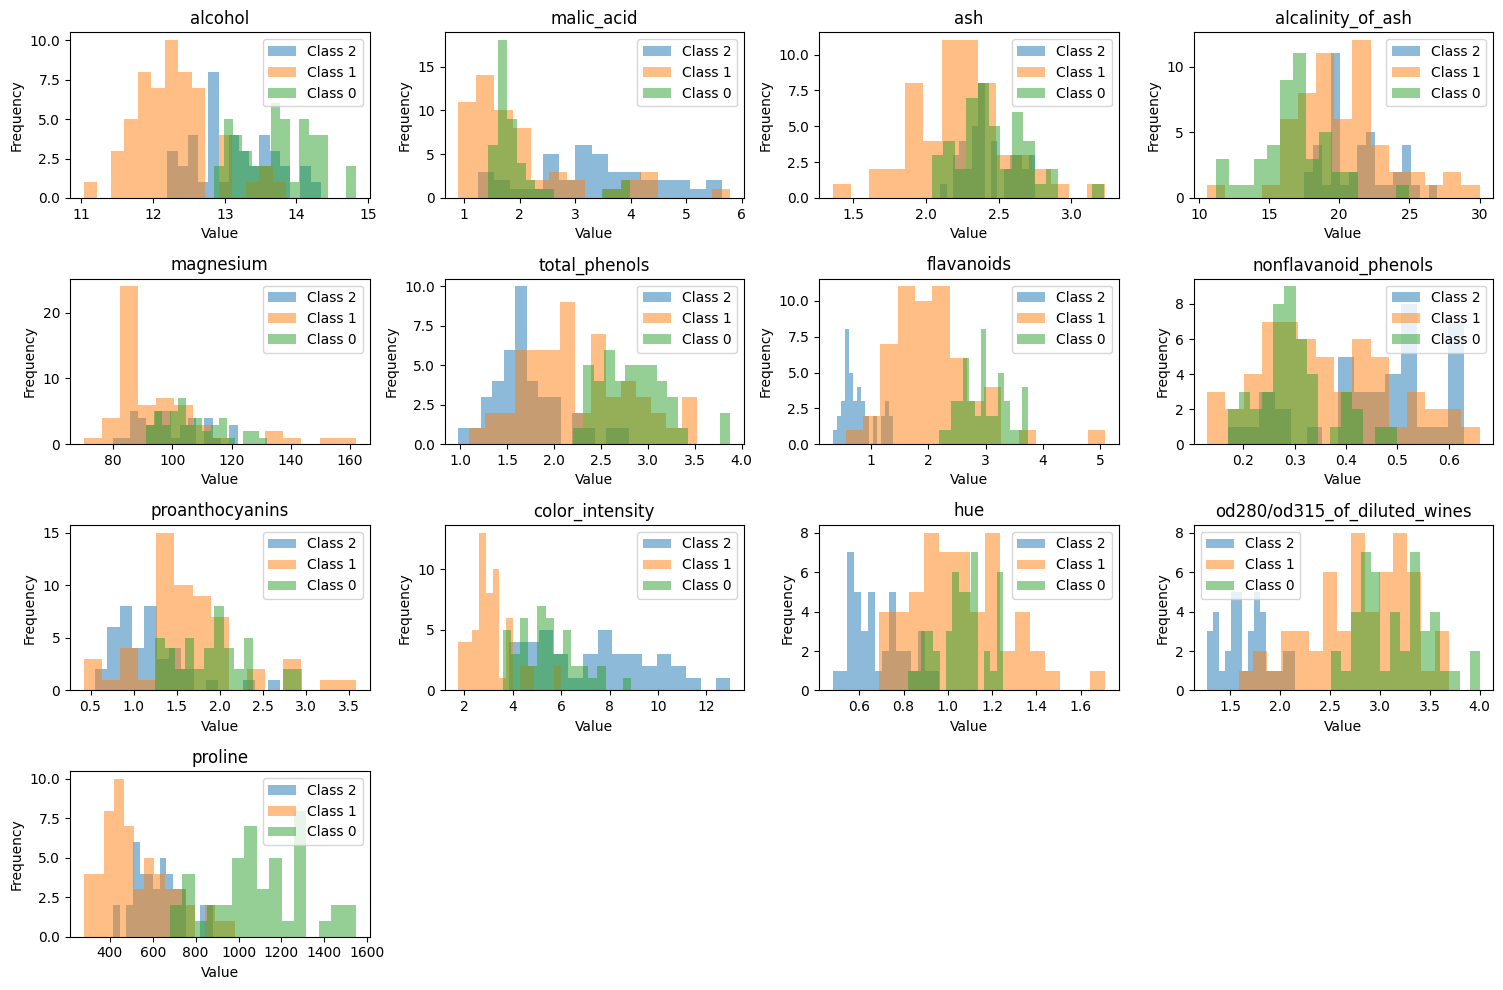

In [ ]:
# Visualize Feature Distributions by Class
# Combine training features and labels for analysis

train_data = pd.concat([X_train, y_train], axis=1)  # Merge X_train and y_train into a single DataFrame

# Set figure size for subplots
plt.figure(figsize=(15, 10))

# Plot histograms for each feature
for i, column in enumerate(X_train.columns, 1):  # Iterate over each feature column
    plt.subplot(4, 4, i)  # Set subplot position
    for label in train_data['target'].unique():  # Iterate over each class label
        subset = train_data[train_data['target'] == label]  # Select data for the current class
        plt.hist(
            subset[column],  # Feature values for this class
            bins=15,         # Number of histogram bins
            alpha=0.5,       # Transparency for overlapping histograms
            label=f'Class {label}'  # Label for the legend
        )
    
    # Configure subplot labels and title
    plt.title(column)        
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()  # Show legend for classes

# Adjust layout and display all plots
plt.tight_layout()
plt.show()


<h1>LDA and KNN Classification on Wine Dataset<h1>

LDA Accuracy: 1.0
LDA Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

LDA Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

KNN Accuracy: 0.7222222222222222
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36

KNN Confusion Matrix:
 [[12  0  2]
 [ 0 11  3]
 [ 2  3  3]]


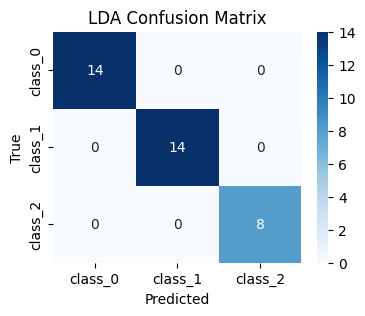

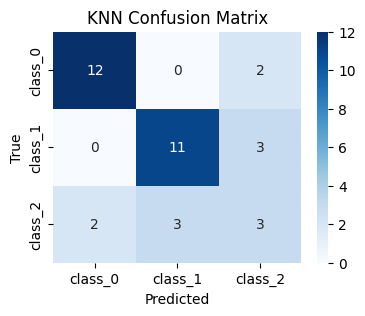

In [ ]:
# LDA and KNN Classification on Wine Dataset

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Train and Predict with LDA
lda_model = LDA()                      # Initialize LDA model
lda_model.fit(X_train, y_train)        # Fit LDA on training data
lda_predict = lda_model.predict(X_test)  # Predict on test data

# Train and Predict with KNN (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)  # Initialize KNN with 5 neighbors
knn_model.fit(X_train, y_train)                  # Fit KNN on training data
knn_predict = knn_model.predict(X_test)          # Predict on test data

# Compute Accuracy
lda_accuracy = accuracy_score(y_test, lda_predict)  # LDA accuracy
knn_accuracy = accuracy_score(y_test, knn_predict)  # KNN accuracy

# Compute Classification Reports and Confusion Matrices
lda_Classification_report = classification_report(y_test, lda_predict)
knn_Classification_report = classification_report(y_test, knn_predict)

lda_Confusion_matrix = confusion_matrix(y_test, lda_predict)
knn_Confusion_matrix = confusion_matrix(y_test, knn_predict)

# Display Results
print(f"LDA Accuracy: {lda_accuracy}")
print("LDA Classification Report:\n", lda_Classification_report)
print("LDA Confusion Matrix:\n", lda_Confusion_matrix)

print(f"\nKNN Accuracy: {knn_accuracy}")
print("KNN Classification Report:\n", knn_Classification_report)
print("KNN Confusion Matrix:\n", knn_Confusion_matrix)

# Plot LDA Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(
    lda_Confusion_matrix, annot=True, fmt='d', cmap="Blues",
    xticklabels=wine.target_names, yticklabels=wine.target_names
)
plt.title('LDA Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot KNN Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(
    knn_Confusion_matrix, annot=True, fmt='d', cmap="Blues",
    xticklabels=wine.target_names, yticklabels=wine.target_names
)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


<h1>KNN Accuracy vs K<h1>

Accuracy for k=1: 0.78
Accuracy for k=3: 0.81
Accuracy for k=5: 0.72
Accuracy for k=10: 0.72
Accuracy for k=15: 0.75
Accuracy for k=20: 0.78


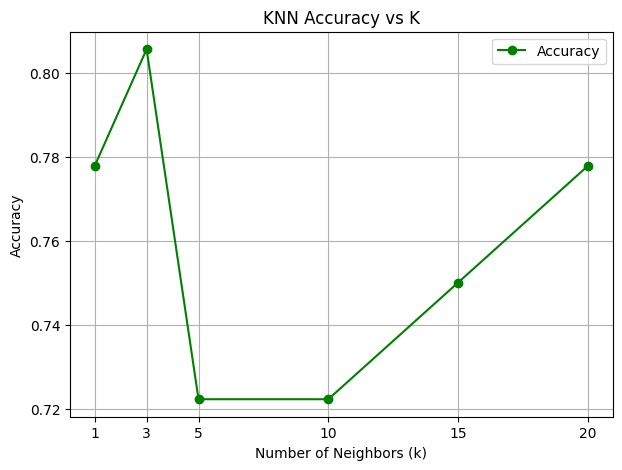

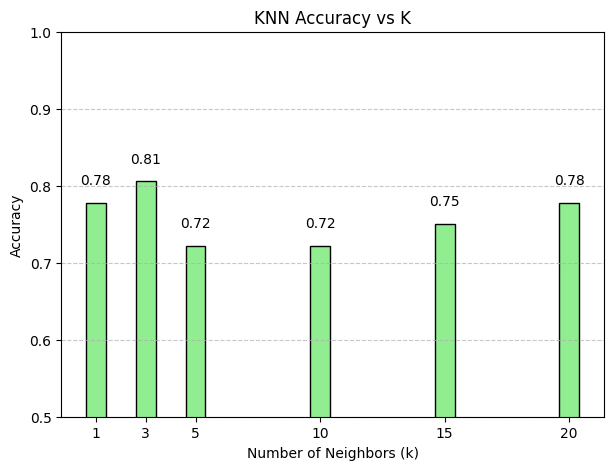

In [ ]:
# KNN Accuracy for Different k Values

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Define different k values to test
k_values = [1, 3, 5, 10, 15, 20]
accuracies = []  # List to store accuracy for each k

# Train KNN and evaluate for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize KNN with current k
    knn.fit(X_train, y_train)                  # Train KNN on training data
    y_predict = knn.predict(X_test)            # Predict on test data
    acc_score = accuracy_score(y_test, y_predict)  # Compute accuracy
    accuracies.append(acc_score)               # Store accuracy

# Display accuracy values
for i, k in enumerate(k_values):
    print(f"Accuracy for k={k}: {accuracies[i]:.2f}")

# Plot Accuracy vs K (Line Chart)
plt.figure(figsize=(7, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='g', label="Accuracy")
plt.title('KNN Accuracy vs K')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# Plot Accuracy vs K (Bar Chart)
plt.figure(figsize=(7, 5))
plt.bar(k_values, accuracies, color='lightgreen', edgecolor='black')
plt.title('KNN Accuracy vs K')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.ylim(0.5, 1)  # Set y-axis range for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate accuracy values above bars
for i, acc in enumerate(accuracies):
    plt.text(k_values[i], acc + 0.02, f"{acc:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()


<h1>Naive Bayes Classification<h1>

Naive Bayes Accuracy: 1.0

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Naive Bayes Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


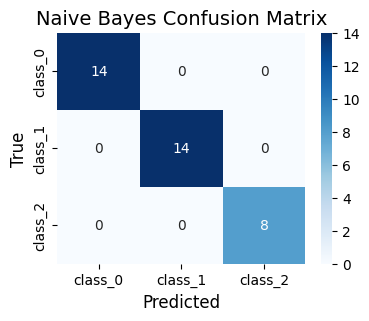

In [ ]:
# Naive Bayes Classification on Wine Dataset

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Gaussian Naive Bayes Model
GaussianNB_model = GaussianNB()            # Initialize Gaussian Naive Bayes model
GaussianNB_model.fit(X_train, y_train)     # Train the model on training data
y_predict_GaussianNB = GaussianNB_model.predict(X_test)  # Predict on test data

# Evaluate Model
GaussianNB_accuracy = accuracy_score(y_test, y_predict_GaussianNB)          # Compute accuracy
GaussianNB_classification_report = classification_report(y_test, y_predict_GaussianNB)  # Classification report
GaussianNB_confusion_matrix = confusion_matrix(y_test, y_predict_GaussianNB)            # Confusion matrix

# Display Results
print("Naive Bayes Accuracy:", GaussianNB_accuracy)
print("\nNaive Bayes Classification Report:\n", GaussianNB_classification_report)
print("\nNaive Bayes Confusion Matrix:\n", GaussianNB_confusion_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(
    GaussianNB_confusion_matrix, annot=True, fmt='d', cmap='Blues',
    xticklabels=wine.target_names, yticklabels=wine.target_names
)
plt.title('Naive Bayes Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.show()
